**Fecha:** _03-02-2025_, _03-02-2025_

**Autor:** _D. Ortiz_

**Materia:** _Procesamiento de Alto Volúmen de Datos_

**Tópico:** _Introducción a PySapark en el Ambiente Databricks_

Importación de librerias

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *


Carga de datos al dataframe y revisión de sus categorías

In [0]:
df00= spark.read.table("default.stroke_pyspark_3_csv")

df00.columns

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

1. -Se cambian los nombres de las columnas


In [0]:
nuevosNombres = ['id','genero','edad','hipertension','enfCardiaca','EdoCivil','trabajo','residencia','nivelGlucosa','IMC','Fumador','paraCardiaco']
df01=df00
for antes, nuevo in zip(df00.columns, nuevosNombres):
    df01 = df01.withColumnRenamed(antes,nuevo)
df01.columns

['id',
 'genero',
 'edad',
 'hipertension',
 'enfCardiaca',
 'EdoCivil',
 'trabajo',
 'residencia',
 'nivelGlucosa',
 'IMC',
 'Fumador',
 'paraCardiaco']

Revisión  de Tipos de Datos


In [0]:
df01.printSchema()

root
 |-- id: string (nullable = true)
 |-- genero: string (nullable = true)
 |-- edad: string (nullable = true)
 |-- hipertension: string (nullable = true)
 |-- enfCardiaca: string (nullable = true)
 |-- EdoCivil: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- residencia: string (nullable = true)
 |-- nivelGlucosa: string (nullable = true)
 |-- IMC: string (nullable = true)
 |-- Fumador: string (nullable = true)
 |-- paraCardiaco: string (nullable = true)



En relación a la coherencia de los datos, se procede a :
    - El tipo de dato "IMC", se pasa a tipo de dato "double"
    - El topo de dato "edad", se pasa a tipo de dato "integer"

In [0]:
df01 = df01.withColumn("edad", df01.edad.cast("int"))
df01 = df01.withColumn("IMC", df01.IMC.cast("double"))

Revision de objeto dataframe spark

In [0]:
df01.show(10)

+-----+------+----+------------+-----------+--------+-------------+----------+------------+----+---------------+------------+
|   id|genero|edad|hipertension|enfCardiaca|EdoCivil|      trabajo|residencia|nivelGlucosa| IMC|        Fumador|paraCardiaco|
+-----+------+----+------------+-----------+--------+-------------+----------+------------+----+---------------+------------+
| 9046|  Male|  67|           0|          1|     Yes|      Private|     Urban|      228.69|36.6|formerly smoked|           1|
|51676|Female|  61|           0|          0|     Yes|Self-employed|     Rural|      202.21|NULL|   never smoked|           1|
|31112|  Male|  80|           0|          1|     Yes|      Private|     Rural|      105.92|32.5|   never smoked|           1|
|60182|Female|  49|           0|          0|     Yes|      Private|     Urban|      171.23|34.4|         smokes|           1|
| 1665|Female|  79|           1|          0|     Yes|Self-employed|     Rural|      174.12|24.0|   never smoked|      

Revisión de datos nulos o imposibles

In [0]:
df01.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df01.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|residencia|nivelGlucosa|IMC|Fumador|paraCardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
|  0|     0|   0|           0|          0|       0|      0|         0|           0|201|      0|           0|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+



Revisión de distribución de datos

In [0]:
df01.groupby('id').count().show()
df01.groupby('edad').count().show()
df01.groupby('hipertension').count().show()
df01.groupby('enfCardiaca').count().show()
df01.groupby('EdoCivil').count().show()
df01.groupby('trabajo').count().show()
df01.groupby('residencia').count().show()
df01.groupby('nivelGlucosa').count().show()
df01.groupby('IMC').count().show()
df01.groupby('Fumador').count().show()
df01.groupby('paraCardiaco').count().show()


+-----+-----+
|   id|count|
+-----+-----+
|51676|    1|
|68794|    1|
|70822|    1|
|52800|    1|
|49003|    1|
|29865|    1|
|39659|    1|
|56831|    1|
|46683|    1|
| 3606|    1|
| 7273|    1|
|18306|    1|
|42743|    1|
|59370|    1|
|23459|    1|
|57569|    1|
|57904|    1|
|10351|    1|
|22254|    1|
|10436|    1|
+-----+-----+
only showing top 20 rows

+----+-----+
|edad|count|
+----+-----+
|  31|   79|
|  65|   62|
|  53|   85|
|  78|  102|
|  34|   68|
|  81|   60|
|  28|   54|
|  76|   50|
|  27|   55|
|  26|   62|
|  44|   75|
|  12|   45|
|  22|   45|
|  47|   75|
|   1|   77|
|  52|   90|
|  13|   57|
|  16|   52|
|   6|   24|
|   3|   46|
+----+-----+
only showing top 20 rows

+------------+-----+
|hipertension|count|
+------------+-----+
|           0| 4612|
|           1|  498|
+------------+-----+

+-----------+-----+
|enfCardiaca|count|
+-----------+-----+
|          0| 4834|
|          1|  276|
+-----------+-----+

+--------+-----+
|EdoCivil|count|
+--------+-----+
|

Se puede observar que la columan IMC presenta datos Nulos o imposibles.
A pesar quue el pocentaje de datos nulos es muy bajo, se requiere crear una estrategia para mutar o cambiar los datos, sin que sean eliminados.

- Se requiere hacer estratos de promedios cada 10 años
- Los promedios por estratos se catalogan por género
- Se sustituye por el promedio los nulos según género/estrato_edad

In [0]:
#Obtener cantidad total de registros 
df01.groupby('genero').count().show()

+------+-----+
|genero|count|
+------+-----+
|Female| 2994|
| Other|    1|
|  Male| 2115|
+------+-----+



Se elimina el valor de Other para que solo queden dos géneros

In [0]:
#Se descarta el registro cuyo valor en género es "Other
df02 = df01.where("genero <> 'Other'")

#Se verifica que ya no está Other

df02.groupby('genero').count().show()

+------+-----+
|genero|count|
+------+-----+
|Female| 2994|
|  Male| 2115|
+------+-----+



Se haya el promedio por rangos de edad del IMC

In [0]:
#Se extrae promedio por IMC de Edades y Female

avg10F = df02.where((col('genero') == lit('Female')) & (col('edad') < 10)).select(mean(col('IMC'))).collect()
avg20F = df02.where((col('genero') == lit('Female')) & (col('edad') > 10) & (col('edad') < 20)).select(mean(col('IMC'))).collect()
avg30F = df02.where((col('genero') == lit('Female')) & (col('edad') > 20) & (col('edad') < 30)).select(mean(col('IMC'))).collect()
avg40F = df02.where((col('genero') == lit('Female')) & (col('edad') > 30) & (col('edad') < 40)).select(mean(col('IMC'))).collect()
avg50F = df02.where((col('genero') == lit('Female')) & (col('edad') > 40) & (col('edad') < 50)).select(mean(col('IMC'))).collect()
avg60F = df02.where((col('genero') == lit('Female')) & (col('edad') > 50) & (col('edad') < 60)).select(mean(col('IMC'))).collect()
avg70F = df02.where((col('genero') == lit('Female')) & (col('edad') > 60) & (col('edad') < 70)).select(mean(col('IMC'))).collect()
avg80F = df02.where((col('genero') == lit('Female')) & (col('edad') > 70) & (col('edad') < 80)).select(mean(col('IMC'))).collect()
avg90F = df02.where((col('genero') == lit('Female')) & (col('edad') > 80) & (col('edad') < 90)).select(mean(col('IMC'))).collect()



print(avg10F)

[Row(avg(IMC)=18.687962962962963)]


Reemplazamos el promedio que hallaamos anteriormente en los valores nulos del IMC

In [0]:
df03 = df02.withColumn(
    "IMC", 
    when(
        (df02['genero'] == 'Female') & 
        (df02['IMC'].isNull()) & 
        (df02['edad'] < 10), 
        avg10F[0][0]
    ).otherwise(df02['IMC'])
)

df03 = df02.withColumn(
    "IMC", 
    when(
        (df02['genero'] == 'Female') & 
        (df02['IMC'].isNull()) & 
        (df02['edad'] < 20), 
        avg20F[0][0]
    ).otherwise(df02['IMC'])
)

df03 = df02.withColumn(
    "IMC", 
    when(
        (df02['genero'] == 'Female') & 
        (df02['IMC'].isNull()) & 
        (df02['edad'] < 30), 
        avg30F[0][0]
    ).otherwise(df02['IMC'])
)

df03 = df02.withColumn(
    "IMC", 
    when(
        (df02['genero'] == 'Female') & 
        (df02['IMC'].isNull()) & 
        (df02['edad'] < 40), 
        avg40F[0][0]
    ).otherwise(df02['IMC'])
)

df03 = df02.withColumn(
    "IMC", 
    when(
        (df02['genero'] == 'Female') & 
        (df02['IMC'].isNull()) & 
        (df02['edad'] < 50), 
        avg50F[0][0]
    ).otherwise(df02['IMC'])
)

df03 = df02.withColumn(
    "IMC", 
    when(
        (df02['genero'] == 'Female') & 
        (df02['IMC'].isNull()) & 
        (df02['edad'] < 60), 
        avg60F[0][0]
    ).otherwise(df02['IMC'])
)

df03 = df02.withColumn(
    "IMC", 
    when(
        (df02['genero'] == 'Female') & 
        (df02['IMC'].isNull()) & 
        (df02['edad'] < 70), 
        avg70F[0][0]
    ).otherwise(df02['IMC'])
)

df03 = df02.withColumn(
    "IMC", 
    when(
        (df02['genero'] == 'Female') & 
        (df02['IMC'].isNull()) & 
        (df02['edad'] < 80), 
        avg80F[0][0]
    ).otherwise(df02['IMC'])
)

df03 = df02.withColumn(
    "IMC", 
    when(
        (df02['genero'] == 'Female') & 
        (df02['IMC'].isNull()) & 
        (df02['edad'] < 90), 
        avg90F[0][0]
    ).otherwise(df02['IMC'])
)


Revisamos el cambio 

In [0]:
df03.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df03.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|residencia|nivelGlucosa|IMC|Fumador|paraCardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
|  0|     0|   0|           0|          0|       0|      0|         0|           0|104|      0|           0|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+



Se realiza el mismo proceso pero con el género MALE

In [0]:

avg10M = df02.where((col('genero') == lit('Male')) & (col('edad') < 10)).select(mean(col('IMC'))).collect()
avg20M = df02.where((col('genero') == lit('Male')) & (col('edad') > 10) & (col('edad') < 20)).select(mean(col('IMC'))).collect()
avg30M = df02.where((col('genero') == lit('Male')) & (col('edad') > 20) & (col('edad') < 30)).select(mean(col('IMC'))).collect()
avg40M = df02.where((col('genero') == lit('Male')) & (col('edad') > 30) & (col('edad') < 40)).select(mean(col('IMC'))).collect()
avg50M = df02.where((col('genero') == lit('Male')) & (col('edad') > 40) & (col('edad') < 50)).select(mean(col('IMC'))).collect()
avg60M = df02.where((col('genero') == lit('Male')) & (col('edad') > 50) & (col('edad') < 60)).select(mean(col('IMC'))).collect()
avg70M = df02.where((col('genero') == lit('Male')) & (col('edad') > 60) & (col('edad') < 70)).select(mean(col('IMC'))).collect()
avg80M = df02.where((col('genero') == lit('Male')) & (col('edad') > 70) & (col('edad') < 80)).select(mean(col('IMC'))).collect()
avg90M = df02.where((col('genero') == lit('Male')) & (col('edad') > 80) & (col('edad') < 90)).select(mean(col('IMC'))).collect()



print(avg10M)

[Row(avg(IMC)=19.03168724279836)]


In [0]:
df04 = df03.withColumn(
    "IMC", 
    when(
        (df03['genero'] == 'Male') & 
        (df03['IMC'].isNull()) & 
        (df03['edad'] < 10), 
        avg10M[0][0]
    ).otherwise(df03['IMC'])
)

df04 = df03.withColumn(
    "IMC", 
    when(
        (df03['genero'] == 'Male') & 
        (df03['IMC'].isNull()) & 
        (df03['edad'] < 20), 
        avg20M[0][0]
    ).otherwise(df03['IMC'])
)

df04 = df03.withColumn(
    "IMC", 
    when(
        (df03['genero'] == 'Male') & 
        (df03['IMC'].isNull()) & 
        (df03['edad'] < 30), 
        avg30M[0][0]
    ).otherwise(df03['IMC'])
)

df04 = df03.withColumn(
    "IMC", 
    when(
        (df03['genero'] == 'Male') & 
        (df03['IMC'].isNull()) & 
        (df03['edad'] < 40), 
        avg40M[0][0]
    ).otherwise(df03['IMC'])
)

df04 = df03.withColumn(
    "IMC", 
    when(
        (df03['genero'] == 'Male') & 
        (df03['IMC'].isNull()) & 
        (df03['edad'] < 50), 
        avg50M[0][0]
    ).otherwise(df03['IMC'])
)

df04 = df03.withColumn(
    "IMC", 
    when(
        (df03['genero'] == 'Male') & 
        (df03['IMC'].isNull()) & 
        (df03['edad'] < 60), 
        avg60M[0][0]
    ).otherwise(df03['IMC'])
)

df04 = df03.withColumn(
    "IMC", 
    when(
        (df03['genero'] == 'Male') & 
        (df03['IMC'].isNull()) & 
        (df03['edad'] < 70), 
        avg70M[0][0]
    ).otherwise(df03['IMC'])
)

df04 = df03.withColumn(
    "IMC", 
    when(
        (df03['genero'] == 'Male') & 
        (df03['IMC'].isNull()) & 
        (df03['edad'] < 80), 
        avg80M[0][0]
    ).otherwise(df03['IMC'])
)

df04 = df03.withColumn(
    "IMC", 
    when(
        (df03['genero'] == 'Male') & 
        (df03['IMC'].isNull()) & 
        (df03['edad'] < 90), 
        avg90M[0][0]
    ).otherwise(df03['IMC'])
)

In [0]:
df04.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df04.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|residencia|nivelGlucosa|IMC|Fumador|paraCardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
|  0|     0|   0|           0|          0|       0|      0|         0|           0|  0|      0|           0|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+



De esta forma nos damos cuenta que ya hemos reemplazados todos los valores nulos por sus promedios correspondientes

**Histograma por edades**

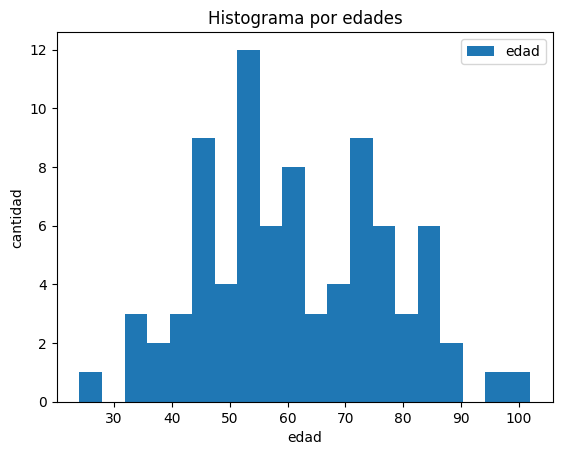

In [0]:
#Grafica Columna
#Edad

clases, cantidad = df04.groupby('edad').count().select('count').rdd.flatMap(lambda x: x).histogram(20)
plt.hist(clases[:-1], bins = clases, weights=cantidad)
plt.ylabel('cantidad')
plt.xlabel('edad')
plt.title('Histograma por edades')
plt.legend(['edad'], loc= 'upper right')
plt.show()


Función para para encontrar el promedio con argumentos específicos

In [0]:

def obtener_promedio_imc(df, genero, rango_edad):
    edad_min, edad_max = rango_edad
    promedio_imc = df.where((col('genero') == lit(genero)) & 
                            (col('edad') >= edad_min) & 
                            (col('edad') < edad_max)) \
                     .select(mean(col('IMC'))).collect()
    return promedio_imc

promedio_imc_10 = obtener_promedio_imc(df02, 'Female', (0, 10))

print(promedio_imc_10)


[Row(avg(IMC)=18.687962962962963)]


> Función para reemplazar el promedio anteriormente hallado en cada casilla nula con el género y rango dado

In [0]:
def actualizar_imc(df, genero, rangos_edad):
    for rango_edad in rangos_edad:
        promedio_imc = obtener_promedio_imc(df, genero, rango_edad)
        df = df.withColumn(
            "IMC", 
            when(
                (df['genero'] == genero) & 
                (df['IMC'].isNull()) & 
                (df['edad'] >= rango_edad[0]) & 
                (df['edad'] < rango_edad[1]), 
                promedio_imc[0][0]
            ).otherwise(df['IMC'])
        )
    return df

rangos_edad = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90)]

df03 = actualizar_imc(df02, 'Female', rangos_edad)


In [0]:
df03.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df03.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|residencia|nivelGlucosa|IMC|Fumador|paraCardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
|  0|     0|   0|           0|          0|       0|      0|         0|           0|104|      0|           0|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+



**Gráfica por Género**

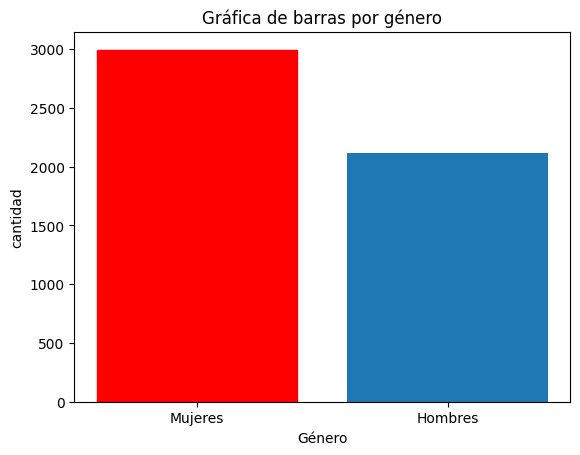

In [0]:
## Genero ##

genero = df04.groupby('genero').count().select('count').rdd.flatMap(lambda x: x).collect()

categoria= ['Mujeres','Hombres']
grafica = plt.bar(categoria,genero)
grafica[0].set_color('r')
plt.ylabel('cantidad')
plt.xlabel('Género')
plt.title('Gráfica de barras por género')
plt.show()



**Gráfica por Enfermedad Caridaca**

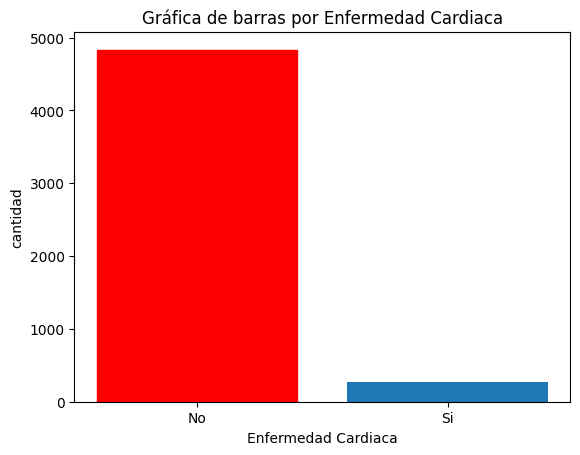

In [0]:
## Gráfica por Enfermedad Caridaca ##

enfCardiaca = df04.groupby('enfCardiaca').count().select('count').rdd.flatMap(lambda x: x).collect()

categoria= ['No','Si']
grafica = plt.bar(categoria,enfCardiaca)
grafica[0].set_color('r')
plt.ylabel('cantidad')
plt.xlabel('Enfermedad Cardiaca')
plt.title('Gráfica de barras por Enfermedad Cardiaca')
plt.show()